Determine the intertidal evolution 
DataBase: Intertidal App - Global Scale
Mishel Reyes - Thesis: Assessing Sea Level Rise impact on Estuary Hydrodynamic

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.cm as cm
#Read the data from Shapefile
shapefile_path = 'Intertidal_Area/Intertidal_Area_App_Est.shp'
data = gpd.read_file(shapefile_path, encoding='utf-8')

analisis = data.groupby(['Est','Year'])['area'].sum()/1000000
df1 = pd.DataFrame(analisis).reset_index()

In [5]:
# List of estuaries
estuary = list(set(data['Est']))
for item in estuary:
    print(item)

# Ask the user to select a name
selection = input("Select a estuary from the list: ")

Coquille_river
Tillamook_bay
Salmon_river
Yaquina_bay
Siletz_bay
Humboldt_bay
Coos_bay
Eel_river
Nestucca_bay
Siuslaw_river
Alsea_bay
Netarts_bay
Nehalem_river
Umpqua_river
Grays_harbour
Willapa_bay
Smith_river
Columbia_river


Valid estuary selected: Alsea_bay
Area by year for Alsea_bay :
          Est    Year      area
0   Alsea_bay  1985.0  7.633227
1   Alsea_bay  1988.0  7.410096
2   Alsea_bay  1991.0  6.364183
3   Alsea_bay  1994.0  6.022499
4   Alsea_bay  1997.0  7.014671
5   Alsea_bay  2000.0  6.161850
6   Alsea_bay  2003.0  6.091472
7   Alsea_bay  2006.0  4.883022
8   Alsea_bay  2009.0  5.004502
9   Alsea_bay  2012.0  6.057824
10  Alsea_bay  2015.0  5.310447


C:\Users\mre003\AppData\Local\Temp\ipykernel_15472\2171926711.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(f_df1['Year'].unique()))


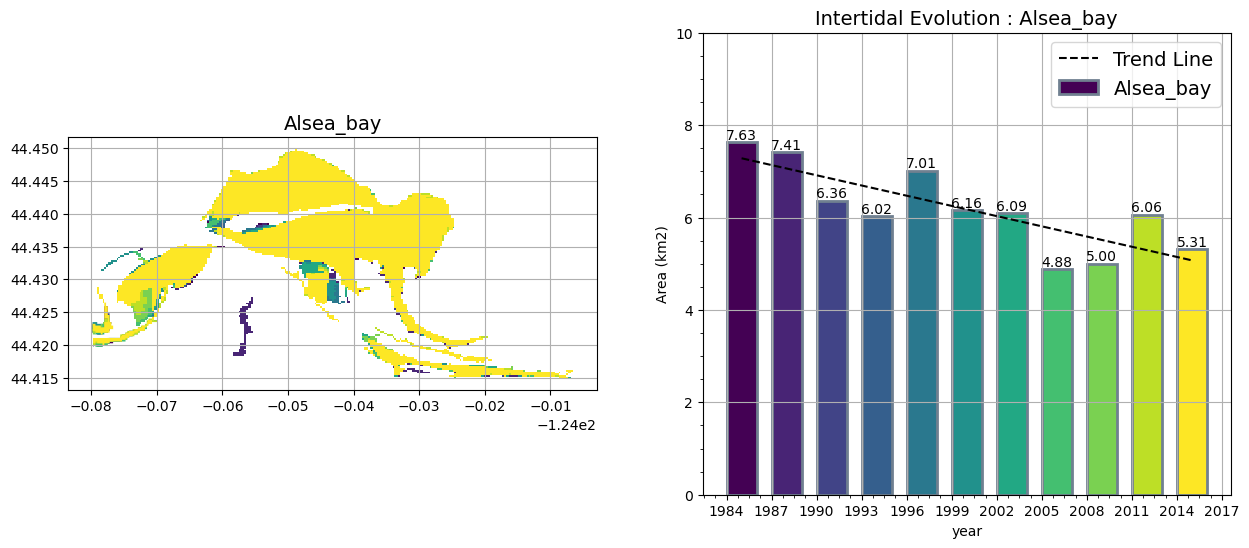

In [9]:
# Check if the selected name is in the list
if selection in estuary:
    print("Valid estuary selected:", selection)
    f_df1 = df1[df1['Est'] == selection]
    
    #limit_ploteo
    ymax = math.ceil(f_df1['area'].max())+2
    
    #correlation
    coefficients = np.polyfit(f_df1['Year'], f_df1['area'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    trendline = slope * f_df1['Year'] + intercept
    
    #texto
    print("Area by year for", selection, ":")
    print(f_df1) #print the area
    f_df1.to_csv(f'Output/Intertidal_Area_{selection}.csv', index=False)

    #colormap
    colormap = plt.cm.get_cmap('viridis', len(f_df1['Year'].unique()))
    
    #figure

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    #plot shapefile


    m = data[data['Est'] == selection]
    #m.plot(ax=axes[0], color=colormap(idx), label=str(year))
    for idx, year in enumerate(m['Year'].unique()[::-1]):
        subset = m[m['Year'] == year]
        subset.plot(ax=axes[0], color=colormap(idx), label=str(year))


    axes[0].set_title(f'{selection}',fontsize = 14, color="black")
    axes[0].grid(True)
    
    #plot intertidal evolution
    plt.title(f"Intertidal Evolution : {selection}", fontsize = 14, color="black")
    plt.bar(f_df1['Year'],f_df1['area'], label = selection, color = ['#440154', '#482475', '#414487', '#355f8d', '#2a788e', '#21918c', '#22a884', '#44bf70', '#7ad151', '#bddf26', '#fde725'], width =2,edgecolor ='#708090',linewidth =2)
    plt.plot(f_df1['Year'], trendline, color='black',linewidth = 1.5, linestyle = '--', label='Trend Line')
    #plt.bar(f_df1['Year'],f_df1['area'], label = selection, linewidth = 0.8, linestyle = '--', color = 'r', marker='o', markersize=8)
    plt.ylabel('Area (km2)')
    plt.xlabel('year')
    plt.ylim(0,ymax)
    plt.minorticks_on()
    plt.grid(True)
    plt.legend(loc='upper right', ncol=1, prop={'size':14}, fancybox=True)
    plt.xticks(np.arange(1984,2018,3))   
    for x, y in zip(f_df1['Year'], f_df1['area']):
        plt.text(x, y,'{:.2f}'.format(y), ha='center', va='bottom')
            
    plt.savefig(f"Output/Intertidal_Area_{selection}.png", bbox_inches='tight')
   
else:
    print("The selected estuary is not in the list.")